In [ ]:
!cp '/content/drive/MyDrive/images.zip' '/content/'

In [ ]:
import zipfile

zip_ref = zipfile.ZipFile('images.zip')
zip_ref.extractall()
zip_ref.close()

# Inspect the data

In [ ]:
!ls images

test  train


In [ ]:
!ls images/train/

knife  spoon


In [ ]:
!ls images/train/knife

 20210621_225153.jpg	    20210621_225231.jpg   knife10.jpg   knife5.jpg
 20210621_225208.jpg	    20210621_225234.jpg   knife1.jpg    knife6.jpg
 20210621_225217.jpg	    20210621_225246.jpg   knife2.jpg    knife7.jpg
 20210621_225220.jpg	    20210621_225258.jpg   knife3.jpg    knife8.jpg
'20210621_225231 (1).jpg'   20210621_225305.jpg   knife4.jpg    knife9.jpg


In [ ]:
import os

for dispath, dirnames, filenames in os.walk("images"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dispath}''")

There are 2 directories and 0 images in 'images''
There are 2 directories and 0 images in 'images/train''
There are 0 directories and 20 images in 'images/train/knife''
There are 0 directories and 23 images in 'images/train/spoon''
There are 2 directories and 0 images in 'images/test''
There are 0 directories and 4 images in 'images/test/knife''
There are 0 directories and 5 images in 'images/test/spoon''


In [ ]:
# Visualise images
import pathlib
import numpy as np

data_dir = pathlib.Path("images/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['knife' 'spoon']


In [ ]:
# Let's visualise
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read the image and plot using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  return img

['20210621_224901.jpg']
Image shape: (3024, 4032, 3)


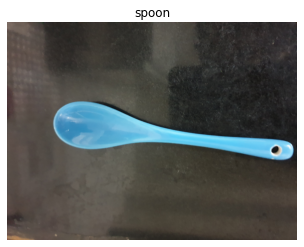

In [ ]:
img = view_random_image(target_dir = "images/train/", target_class = "spoon")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(3024, 4032, 3), dtype=uint8, numpy=
array([[[123, 108, 101],
        [116, 101,  94],
        [123, 108, 101],
        ...,
        [ 50,  36,  25],
        [ 50,  36,  25],
        [ 52,  38,  29]],

       [[123, 108, 101],
        [121, 106,  99],
        [124, 109, 102],
        ...,
        [ 52,  38,  27],
        [ 50,  36,  25],
        [ 52,  38,  29]],

       [[123, 108, 101],
        [122, 107, 100],
        [121, 106,  99],
        ...,
        [ 50,  36,  25],
        [ 48,  34,  23],
        [ 50,  36,  27]],

       ...,

       [[132,  95,  76],
        [133,  96,  77],
        [133,  96,  77],
        ...,
        [ 69,  59,  50],
        [ 71,  61,  52],
        [ 70,  60,  51]],

       [[128,  91,  72],
        [132,  95,  76],
        [132,  95,  76],
        ...,
        [ 71,  61,  52],
        [ 72,  62,  53],
        [ 70,  60,  51]],

       [[128,  91,  72],
        [132,  95,  76],
        [132,  95,  76],
        ...,
        [ 71,  61, 

In [ ]:
import os
import re
from PIL import Image
import sys

# Function to resize the images and and delete the old pictures with high resolution
def prepare_image(path,pattern):

  # Find images in path and resizing it
  dir = path
  dirs = os.listdir( path )
  for item in dirs:
      if os.path.isfile(path+item):
          im = Image.open(path+item)
          f, e = os.path.splitext(path+item)
          imResize = im.resize((224,224), Image.ANTIALIAS)
          imResize.save(f + '_resized.jpg', 'JPEG', quality=90)

  # deleting the files with high resolution provided by the pattern
  for f in os.listdir(dir):
        if re.search(pattern, f):
            os.remove(os.path.join(dir, f))


In [ ]:
prepare_image(path = "images/train/spoon/", pattern = "^(?!.*(_resized))")
prepare_image(path = "images/train/knife/", pattern = "^(?!.*(_resized))")
prepare_image(path = "images/test/spoon/", pattern = "^(?!.*(_resized))")
prepare_image(path = "images/test/knife/", pattern = "^(?!.*(_resized))")

['20210621_225017_resized.jpg']
Image shape: (224, 224, 3)


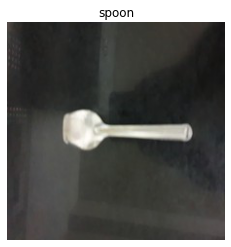

In [ ]:
img = view_random_image(target_dir = "images/train/", target_class = "spoon")

# Preprocess the data

In [ ]:
# Define the directory
train_dir = "images/train/"
test_dir = "images/test/"

our next step would be turn our data into **batches**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create train and test data generators and rescale the data
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
# Load in our image data from directory
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                              target_size=(224, 224),
                                              class_mode = "binary")

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                            target_size = (224,224),
                                            class_mode = "binary")

Found 43 images belonging to 2 classes.
Found 9 images belonging to 2 classes.


# Create the baseline model

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
# Set seed
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    Conv2D(filters = 10, kernel_size = 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification so only one output neuron)
])

# Compile the model
model_1.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten (Flatten)            (None, 475240)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
2/2 [==============================] - 31s 560ms/step - loss: 3.5461 - accuracy: 0.5116 - val_loss: 0.4781 - val_accuracy: 0.7778
Epoch 2/5
2/2 [==============================] - 0s 77ms/step - loss: 1.7926 - accuracy: 0.5814 - val_loss: 2.2910 - val_accuracy: 0.5556
Epoch 3/5
2/2 [==============================] - 0s 69ms/step - loss: 4.7887 - accuracy: 0.5349 - val_loss: 0.6181 - val_accuracy: 0.4444
Epoch 4/5
2/2 [==============================] - 0s 67ms/step - loss: 1.4428 - accuracy: 0.7209 - val_loss: 1.6238 - val_accuracy: 0.4444
Epoch 5/5
2/2 [==============================] - 0s 66ms/step - loss: 3.0884 - accuracy: 0.4651 - val_loss: 0.6192 - val_accuracy: 0.4444


In [ ]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for

  # Plot the loss
  plt.plot(epochs, loss, label = "Training loss")
  plt.plot(epochs, val_loss, label = "Val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot the accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "Training Accuracy")
  plt.plot(epochs, val_accuracy, label = "Val_Accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()

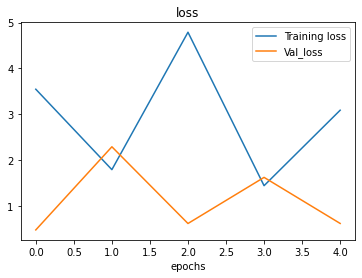

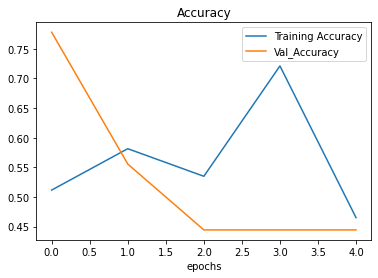

In [ ]:
plot_loss_curves(history_1)

In [ ]:
model_1.evaluate(test_data)

1/1 [==============================] - 0s 41ms/step - loss: 0.6192 - accuracy: 0.4444


[0.6192333698272705, 0.4444444477558136]

## overfitting the data

Let's look by adding regualarization layers

In [ ]:
# create the model
model_2 = tf.keras.Sequential([
    Conv2D(filters = 10, kernel_size = 3, activation = "relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size = 2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs = 10,
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/10
2/2 [==============================] - 1s 311ms/step - loss: 0.7577 - accuracy: 0.3953 - val_loss: 0.7128 - val_accuracy: 0.4444
Epoch 2/10
2/2 [==============================] - 0s 106ms/step - loss: 0.7040 - accuracy: 0.5349 - val_loss: 0.6940 - val_accuracy: 0.5556
Epoch 3/10
2/2 [==============================] - 0s 103ms/step - loss: 0.6873 - accuracy: 0.5349 - val_loss: 0.6889 - val_accuracy: 0.5556
Epoch 4/10
2/2 [==============================] - 0s 58ms/step - loss: 0.6886 - accuracy: 0.5349 - val_loss: 0.6848 - val_accuracy: 0.5556
Epoch 5/10
2/2 [==============================] - 0s 63ms/step - loss: 0.6840 - accuracy: 0.5349 - val_loss: 0.6818 - val_accuracy: 0.5556
Epoch 6/10
2/2 [==============================] - 0s 60ms/step - loss: 0.6621 - accuracy: 0.6977 - val_loss: 0.6786 - val_accuracy: 0.5556
Epoch 7/10
2/2 [==============================] - 0s 110ms/step - loss: 0.6534 - accuracy: 0.7674 - val_loss: 0.6739 - val_accuracy: 0.5556
Epoch 8/10
2/2 [=======

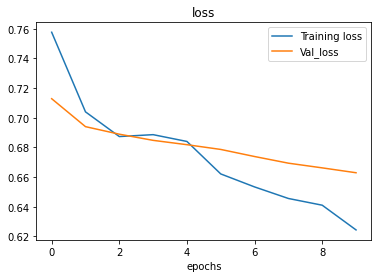

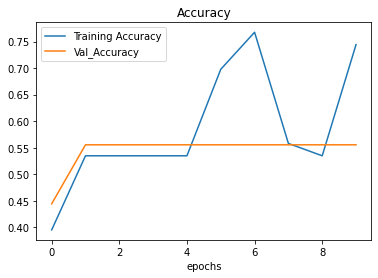

In [ ]:
plot_loss_curves(history_2)

In [ ]:
model_2.evaluate(test_data)

1/1 [==============================] - 0s 42ms/step - loss: 0.6629 - accuracy: 0.5556


[0.6629132628440857, 0.5555555820465088]

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6760)             

In [ ]:
# Let's look by training for more
# create the model
model_3 = tf.keras.Sequential([
    Conv2D(filters = 10, kernel_size = 3, activation = "relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size = 2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs = 15,
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/15
2/2 [==============================] - 1s 163ms/step - loss: 0.7185 - accuracy: 0.5349 - val_loss: 0.6772 - val_accuracy: 0.6667
Epoch 2/15
2/2 [==============================] - 0s 110ms/step - loss: 0.6812 - accuracy: 0.5349 - val_loss: 0.6826 - val_accuracy: 0.5556
Epoch 3/15
2/2 [==============================] - 0s 61ms/step - loss: 0.6893 - accuracy: 0.5581 - val_loss: 0.6743 - val_accuracy: 0.7778
Epoch 4/15
2/2 [==============================] - 0s 108ms/step - loss: 0.6635 - accuracy: 0.6977 - val_loss: 0.6699 - val_accuracy: 0.6667
Epoch 5/15
2/2 [==============================] - 0s 56ms/step - loss: 0.6596 - accuracy: 0.7209 - val_loss: 0.6677 - val_accuracy: 0.6667
Epoch 6/15
2/2 [==============================] - 0s 107ms/step - loss: 0.6500 - accuracy: 0.7442 - val_loss: 0.6624 - val_accuracy: 0.6667
Epoch 7/15
2/2 [==============================] - 0s 60ms/step - loss: 0.6402 - accuracy: 0.8140 - val_loss: 0.6561 - val_accuracy: 0.7778
Epoch 8/15
2/2 [=======

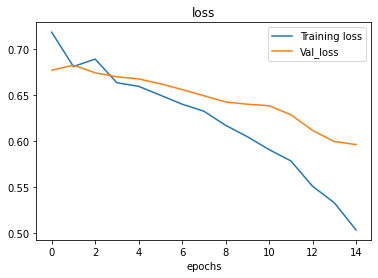

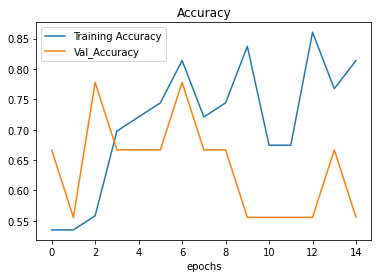

In [ ]:
plot_loss_curves(history_3)

In [ ]:
model_3.evaluate(test_data)

1/1 [==============================] - 0s 44ms/step - loss: 0.5962 - accuracy: 0.5556


[0.5962150692939758, 0.5555555820465088]

It decreased our accuracy therefore increasing epochs did not help

In [ ]:
# Let's try data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             zoom_range = 0.2,
                                             shear_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             horizontal_flip = True)

In [ ]:
# Load in our image data from directory
train_data_augmented = train_datagen_augmented.flow_from_directory(directory = train_dir,
                                              target_size=(224, 224),
                                              class_mode = "binary")


Found 43 images belonging to 2 classes.


In [ ]:
# Let's look by training for more
# create the model
model_4 = tf.keras.Sequential([
    Conv2D(filters = 10, kernel_size = 3, activation = "relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size = 2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_4.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

# Fit the model
history_4 = model_4.fit(train_data_augmented,
                        epochs = 15,
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/15
2/2 [==============================] - 1s 472ms/step - loss: 0.7011 - accuracy: 0.4651 - val_loss: 0.7000 - val_accuracy: 0.5556
Epoch 2/15
2/2 [==============================] - 0s 355ms/step - loss: 0.6967 - accuracy: 0.4884 - val_loss: 0.7000 - val_accuracy: 0.4444
Epoch 3/15
2/2 [==============================] - 0s 346ms/step - loss: 0.6914 - accuracy: 0.6047 - val_loss: 0.7008 - val_accuracy: 0.4444
Epoch 4/15
2/2 [==============================] - 0s 378ms/step - loss: 0.6881 - accuracy: 0.5581 - val_loss: 0.6998 - val_accuracy: 0.5556
Epoch 5/15
2/2 [==============================] - 0s 151ms/step - loss: 0.6880 - accuracy: 0.5349 - val_loss: 0.7008 - val_accuracy: 0.5556
Epoch 6/15
2/2 [==============================] - 0s 140ms/step - loss: 0.6901 - accuracy: 0.5116 - val_loss: 0.7009 - val_accuracy: 0.5556
Epoch 7/15
2/2 [==============================] - 0s 146ms/step - loss: 0.6849 - accuracy: 0.5349 - val_loss: 0.7014 - val_accuracy: 0.5556
Epoch 8/15
2/2 [====

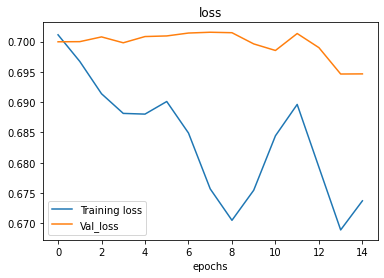

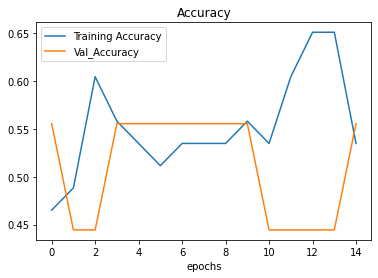

In [ ]:
plot_loss_curves(history_4)

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6760)             

In [ ]:
# Let's look by training for more
# create the model
model_5 = tf.keras.Sequential([
    Conv2D(filters = 10, kernel_size = 3, activation = "relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size = 2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_5.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

# Fit the model
history_5 = model_5.fit(train_data_augmented,
                        epochs = 10,
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/10
2/2 [==============================] - 1s 272ms/step - loss: 0.7542 - accuracy: 0.4186 - val_loss: 0.6904 - val_accuracy: 0.5556
Epoch 2/10
2/2 [==============================] - 0s 139ms/step - loss: 0.6977 - accuracy: 0.5349 - val_loss: 0.6896 - val_accuracy: 0.5556
Epoch 3/10
2/2 [==============================] - 0s 350ms/step - loss: 0.6999 - accuracy: 0.4651 - val_loss: 0.6897 - val_accuracy: 0.4444
Epoch 4/10
2/2 [==============================] - 0s 350ms/step - loss: 0.6948 - accuracy: 0.5349 - val_loss: 0.6862 - val_accuracy: 0.7778
Epoch 5/10
2/2 [==============================] - 0s 351ms/step - loss: 0.6825 - accuracy: 0.5349 - val_loss: 0.6870 - val_accuracy: 0.5556
Epoch 6/10
2/2 [==============================] - 0s 142ms/step - loss: 0.6822 - accuracy: 0.5349 - val_loss: 0.6944 - val_accuracy: 0.5556
Epoch 7/10
2/2 [==============================] - 0s 151ms/step - loss: 0.6890 - accuracy: 0.5581 - val_loss: 0.6966 - val_accuracy: 0.5556
Epoch 8/10
2/2 [====

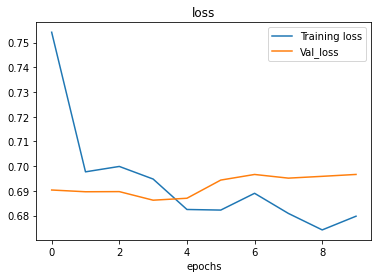

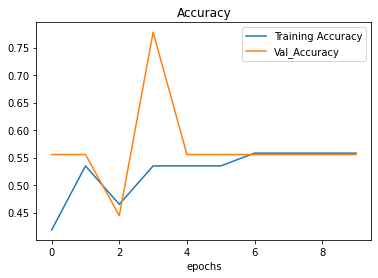

In [ ]:
plot_loss_curves(history_5)

In [ ]:
# Let's look by training for more
# create the model
model_6 = tf.keras.Sequential([
    Conv2D(filters = 10, kernel_size = 3, activation = "relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size = 2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs = 20,
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/20
2/2 [==============================] - 1s 259ms/step - loss: 1.0138 - accuracy: 0.4651 - val_loss: 0.8688 - val_accuracy: 0.4444
Epoch 2/20
2/2 [==============================] - 0s 350ms/step - loss: 1.3224 - accuracy: 0.3721 - val_loss: 0.8742 - val_accuracy: 0.5556
Epoch 3/20
2/2 [==============================] - 0s 354ms/step - loss: 1.4356 - accuracy: 0.5349 - val_loss: 0.8450 - val_accuracy: 0.5556
Epoch 4/20
2/2 [==============================] - 0s 353ms/step - loss: 1.0703 - accuracy: 0.5349 - val_loss: 0.7180 - val_accuracy: 0.5556
Epoch 5/20
2/2 [==============================] - 0s 147ms/step - loss: 0.7354 - accuracy: 0.5349 - val_loss: 0.7211 - val_accuracy: 0.4444
Epoch 6/20
2/2 [==============================] - 0s 344ms/step - loss: 0.8540 - accuracy: 0.4651 - val_loss: 0.7272 - val_accuracy: 0.4444
Epoch 7/20
2/2 [==============================] - 0s 151ms/step - loss: 0.8719 - accuracy: 0.4651 - val_loss: 0.7095 - val_accuracy: 0.4444
Epoch 8/20
2/2 [====

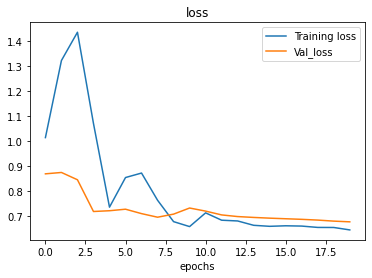

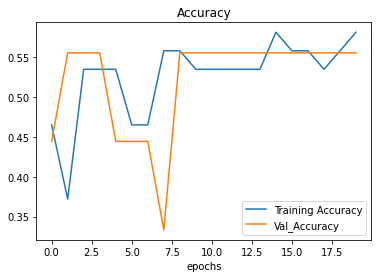

In [ ]:
plot_loss_curves(history_6)

In [ ]:
model_6.evaluate(test_data)

1/1 [==============================] - 0s 40ms/step - loss: 0.6766 - accuracy: 0.5556


[0.6766437888145447, 0.5555555820465088]

In [ ]:
# Let's look by decreasing complexity
# create the model
model_7 = tf.keras.Sequential([
    Conv2D(filters = 10, kernel_size = 3, activation = "relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented,
                        epochs = 15,
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/15
2/2 [==============================] - 1s 450ms/step - loss: 1.0625 - accuracy: 0.5581 - val_loss: 1.1601 - val_accuracy: 0.4444
Epoch 2/15
2/2 [==============================] - 0s 353ms/step - loss: 2.4063 - accuracy: 0.4651 - val_loss: 0.7967 - val_accuracy: 0.4444
Epoch 3/15
2/2 [==============================] - 0s 340ms/step - loss: 0.8881 - accuracy: 0.5116 - val_loss: 0.8159 - val_accuracy: 0.5556
Epoch 4/15
2/2 [==============================] - 0s 154ms/step - loss: 1.3396 - accuracy: 0.5349 - val_loss: 0.7221 - val_accuracy: 0.5556
Epoch 5/15
2/2 [==============================] - 0s 348ms/step - loss: 0.8303 - accuracy: 0.4651 - val_loss: 0.7334 - val_accuracy: 0.4444
Epoch 6/15
2/2 [==============================] - 0s 346ms/step - loss: 1.0938 - accuracy: 0.4651 - val_loss: 0.7439 - val_accuracy: 0.4444
Epoch 7/15
2/2 [==============================] - 0s 136ms/step - loss: 0.9738 - accuracy: 0.4651 - val_loss: 0.7031 - val_accuracy: 0.5556
Epoch 8/15
2/2 [====

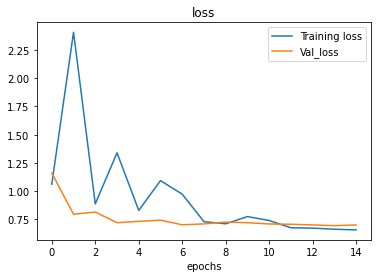

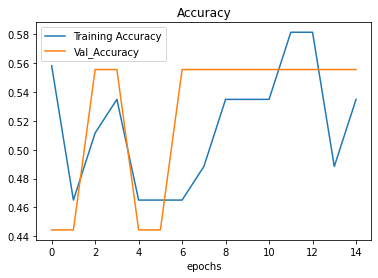

In [ ]:
plot_loss_curves(history_7)

In [ ]:
model_7.evaluate(test_data)

1/1 [==============================] - 0s 49ms/step - loss: 0.7017 - accuracy: 0.5556


[0.7016739249229431, 0.5555555820465088]

In [ ]:
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
flatten_6 (Flatten)          (None, 118810)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 118811    
Total params: 120,001
Trainable params: 120,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Let's look by decreasing complexity
# create the model
model_8 = tf.keras.Sequential([
    Conv2D(filters = 10, kernel_size = 3, activation = "relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_8.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented,
                        epochs = 10,
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/10
2/2 [==============================] - 1s 250ms/step - loss: 4.5952 - accuracy: 0.4884 - val_loss: 2.2468 - val_accuracy: 0.5556
Epoch 2/10
2/2 [==============================] - 0s 152ms/step - loss: 5.3915 - accuracy: 0.5116 - val_loss: 2.2553 - val_accuracy: 0.4444
Epoch 3/10
2/2 [==============================] - 0s 150ms/step - loss: 4.8448 - accuracy: 0.4651 - val_loss: 0.6544 - val_accuracy: 0.6667
Epoch 4/10
2/2 [==============================] - 0s 347ms/step - loss: 2.5061 - accuracy: 0.5349 - val_loss: 1.5055 - val_accuracy: 0.5556
Epoch 5/10
2/2 [==============================] - 0s 348ms/step - loss: 2.3488 - accuracy: 0.5349 - val_loss: 0.6809 - val_accuracy: 0.4444
Epoch 6/10
2/2 [==============================] - 0s 142ms/step - loss: 1.3349 - accuracy: 0.4884 - val_loss: 0.8673 - val_accuracy: 0.4444
Epoch 7/10
2/2 [==============================] - 0s 148ms/step - loss: 1.8740 - accuracy: 0.4651 - val_loss: 0.7282 - val_accuracy: 0.5556
Epoch 8/10
2/2 [====

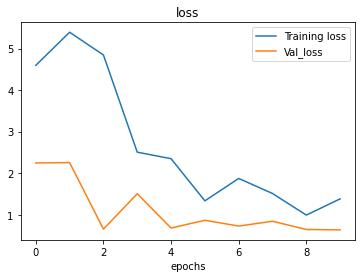

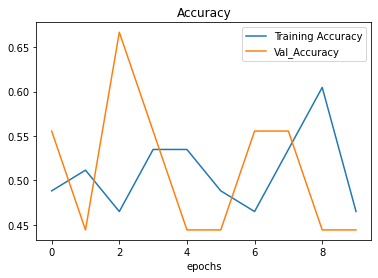

In [ ]:
plot_loss_curves(history_8)

In [ ]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 123210)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 123211    
Total params: 123,491
Trainable params: 123,491
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Let's look by decreasing complexity
# create the model
model_9 = tf.keras.Sequential([
    Conv2D(filters = 10, kernel_size = 3, activation = "relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

# Fit the model
history_9 = model_9.fit(train_data_augmented,
                        epochs = 20,
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/20
2/2 [==============================] - 1s 453ms/step - loss: 1.7215 - accuracy: 0.4651 - val_loss: 0.7516 - val_accuracy: 0.5556
Epoch 2/20
2/2 [==============================] - 0s 144ms/step - loss: 0.8992 - accuracy: 0.6047 - val_loss: 0.7166 - val_accuracy: 0.4444
Epoch 3/20
2/2 [==============================] - 0s 151ms/step - loss: 0.8508 - accuracy: 0.4651 - val_loss: 0.7043 - val_accuracy: 0.4444
Epoch 4/20
2/2 [==============================] - 0s 358ms/step - loss: 0.7172 - accuracy: 0.4651 - val_loss: 0.7018 - val_accuracy: 0.4444
Epoch 5/20
2/2 [==============================] - 0s 358ms/step - loss: 0.7038 - accuracy: 0.4651 - val_loss: 0.7012 - val_accuracy: 0.4444
Epoch 6/20
2/2 [==============================] - 0s 141ms/step - loss: 0.6967 - accuracy: 0.4651 - val_loss: 0.7002 - val_accuracy: 0.4444
Epoch 7/20
2/2 [==============================] - 0s 348ms/step - loss: 0.6918 - accuracy: 0.5116 - val_loss: 0.6985 - val_accuracy: 0.4444
Epoch 8/20
2/2 [====

In [ ]:
model_9.evaluate(test_data)

1/1 [==============================] - 0s 40ms/step - loss: 0.7231 - accuracy: 0.5556


[0.7230607867240906, 0.5555555820465088]

Uptil now model_7 performed best by acheiveing 77% accuracy

In [ ]:
# Load custom images

In [ ]:
spoon = mpimg.imread("spoon1.jpg")

(-0.5, 240.5, 208.5, -0.5)

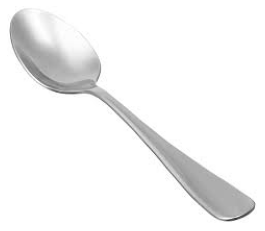

In [ ]:
plt.imshow(spoon)
plt.axis(False)

In [ ]:
# Create a function to import image and resize it to able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, colour_channels)
  """
  # Read in image
  img = tf.io.read_file(filename)
  # decode the read file into the tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our image
spoon = load_and_prep_image("spoon1.jpg")
spoon

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)>

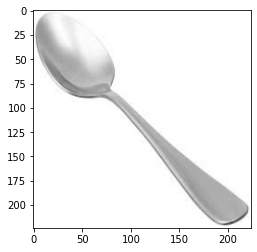

In [ ]:
plt.imshow(spoon)

In [ ]:
pred = model_7.predict(tf.expand_dims(spoon,axis=0))

In [ ]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'spoon'

In [ ]:
def pred_and_plot(model, filename, class_names = class_names):
  """
  Imports an image located with filename,
  makes a prediction with model and plots the image
  with predicted class as the title
  """

  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make prediction
  pred = model.predict(tf.expand_dims(img, axis = 0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"prediction: {pred_class}")
  plt.axis(False);

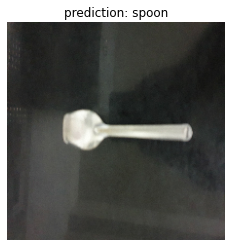

In [ ]:
pred_and_plot(model_2, "spoon23.jpg")

In [ ]:
class_names

array(['knife', 'spoon'], dtype='<U5')

In [ ]:
model_1.evaluate(test_data)

1/1 [==============================] - 0s 46ms/step - loss: 0.6192 - accuracy: 0.4444


[0.6192333698272705, 0.4444444477558136]

In [ ]:
model_2.evaluate(test_data)

1/1 [==============================] - 0s 44ms/step - loss: 0.6629 - accuracy: 0.5556


[0.6629132032394409, 0.5555555820465088]

In [ ]:
model_3.evaluate(test_data)

1/1 [==============================] - 0s 42ms/step - loss: 0.5962 - accuracy: 0.5556


[0.5962151288986206, 0.5555555820465088]

In [ ]:
model_4.evaluate(test_data)

1/1 [==============================] - 0s 41ms/step - loss: 0.6947 - accuracy: 0.5556


[0.6946741342544556, 0.5555555820465088]

In [ ]:
model_5.evaluate(test_data)

1/1 [==============================] - 0s 43ms/step - loss: 0.6966 - accuracy: 0.5556


[0.696649432182312, 0.5555555820465088]

In [ ]:
model_6.evaluate(test_data)

1/1 [==============================] - 0s 41ms/step - loss: 0.6766 - accuracy: 0.5556


[0.6766437292098999, 0.5555555820465088]

In [ ]:
model_7.evaluate(test_data)

1/1 [==============================] - 0s 44ms/step - loss: 0.7017 - accuracy: 0.5556


[0.7016738653182983, 0.5555555820465088]

In [ ]:
model_8.evaluate(test_data)

1/1 [==============================] - 0s 43ms/step - loss: 0.6354 - accuracy: 0.4444


[0.6353893280029297, 0.4444444477558136]

In [ ]:
model_9.evaluate(test_data)

1/1 [==============================] - 0s 57ms/step - loss: 0.7231 - accuracy: 0.5556


[0.7230608463287354, 0.5555555820465088]

# Creating model using Transfer learning

In [ ]:
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [ ]:
# Let's compare following two models
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
resnet152_url = "https://tfhub.dev/google/bit/s-r152x4/ilsvrc2012_classification/1"

efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"
efficientnetB7_url = "https://tfhub.dev/tensorflow/efficientnet/b7/classification/1"

In [ ]:
# Create function to create model
import tensorflow_hub as hub
def create_model(model_url, num_classes):
  """
  Takes a TensorFlow Hub model url and return model

  Args:
    model_url(str): A TensorFlow Hub extraction url
    num_classes(str): no of output neurons in output layer

  Returns:
    An uncompiled Keras sequential model with model_url as feature extractor
    layer and Dense output layer with num_classes output neuron
  """

  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           name="feature_extractor_layer",
                                           input_shape=(224, 224)+(3,))

  model = tf.keras.Sequential([
      feature_extractor_layer,
      tf.keras.layers.Dense(1, activation="sigmoid")
  ])

  return model

In [ ]:
resnet_model = create_model(resnet_url, num_classes=train_data.num_classes)

NameError: ignored

In [ ]:
resnet152_model = create_model(resnet152_url, num_classes=train_data.num_classes)

In [ ]:
efficientnet_model = create_model(efficientnet_url, num_classes=train_data.num_classes)

In [ ]:
efficientnetB7_model = create_model(efficientnetB7_url, num_classes=train_data.num_classes)

In [ ]:
resnet_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extractor_layer (Ker (None, 2048)              23564800  
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 2049      
Total params: 23,566,849
Trainable params: 2,049
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
resnet_model.compile(loss="Binary_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

resnet_history = resnet_model.fit(train_data,
                                  callbacks = [create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                         experiment_name="resnet50V2")])

Saving TensorBoard log files to: tensorflow_hub/resnet50V2/20210624-133938


ValueError: ignored

In [ ]:
efficientnet_model.compile(loss=tf.keras.losses.BinaryCrossentropy,
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

efficientnet_history = efficientnet_model.fit(train_data,
                                  callbacks = [create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                         experiment_name="efficientB0")])

Saving TensorBoard log files to: tensorflow_hub/efficientB0/20210624-133941


TypeError: ignored

In [ ]:
efficientnetB7_model.compile(loss="Binary_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

efficientnetB7_history = efficientnetB7_model.fit(train_data,
                                  callbacks = [create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                         experiment_name="efficientB7")])

Saving TensorBoard log files to: tensorflow_hub/efficientB7/20210624-133950


ValueError: ignored

In [ ]:
resnet152_model.compile(loss="Binary_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

resnet152_history = resnet152_model.fit(train_data,
                                  callbacks = [create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                         experiment_name="resnet152")])

Saving TensorBoard log files to: tensorflow_hub/resnet152/20210624-133956


ValueError: ignored